# ANL Data Visualization

## Imports and Setup
### *Run this before any cells below*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## View Raw Wave Forms

In [8]:
'''
Load Data
'''
filename = "Data/CoarseScan.npz" #Enter File name in quotes
data = np.load(filename)

# Extract arrays
x = data["x"]          # shape (1, N_x)
BPDwf = data["BPDwf"]  # shape (M, 3, N_y)
ictwf = data["ictwf"]  # shape (M, 3, N_y)
phase = data["phase"]  # shape (M,)

print(f"---- Data Dimensions ---- \n\
x: {x.shape} \n\
BPDwf: {BPDwf.shape} \n\
ictwf: {ictwf.shape} \n\
phase: {phase.shape}\n ")

---- Data Dimensions ---- 
x: (1, 5000) 
BPDwf: (3601, 3, 5000) 
ictwf: (3601, 3, 2502) 
phase: (3601,)
 


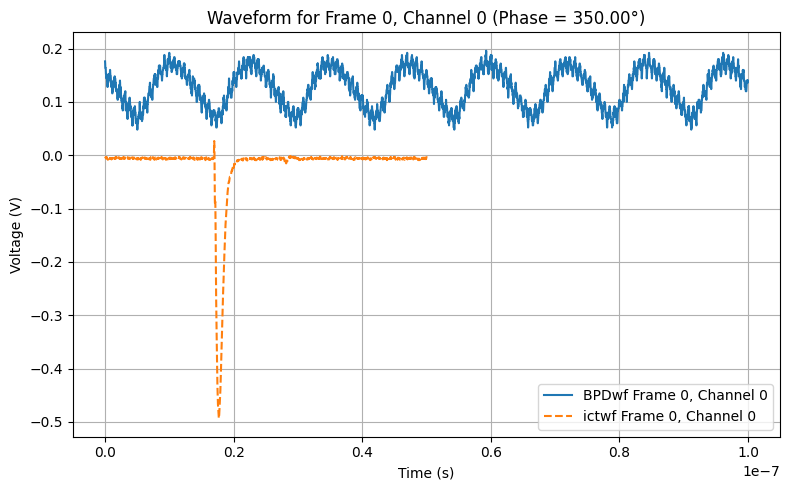

In [ ]:
'''
Display Waveform(s) for individual Phase Angle
'''
phase_angle = 350.0   # change to phase angle
phase_index = np.where(phase == phase_angle)[0][0]  # Get the integer index
channel = 0   # channel index (0 ≤ j < 3)

# Trim x to match each waveform length separately
x_BPD = x[0, :BPDwf.shape[2]]  # trim to BPD length
x_ict = x[0, :ictwf.shape[2]]  # trim to ict length

# Plot BPD waveform
plt.figure(figsize=(8, 5))

#Comment this line to hide BPD wave
plt.plot(x_BPD, BPDwf[phase_index, channel, :], label=f"BPDwf Frame {phase_index}, Channel {channel}")

#Comment this line to hide ICT wave
plt.plot(x_ict, ictwf[phase_index, channel, :], label=f"ictwf Frame {phase_index}, Channel {channel}", linestyle="--")

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title(f"Waveform for Frame {phase_index}, Channel {channel} (Phase = {phase[phase_index]:.2f}°)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## View Extremas Data

In [25]:
''' 
Import Extremas Data
'''
# Set file name in quotes
extremas = pd.read_csv("Results/course_scan_extremas.csv")

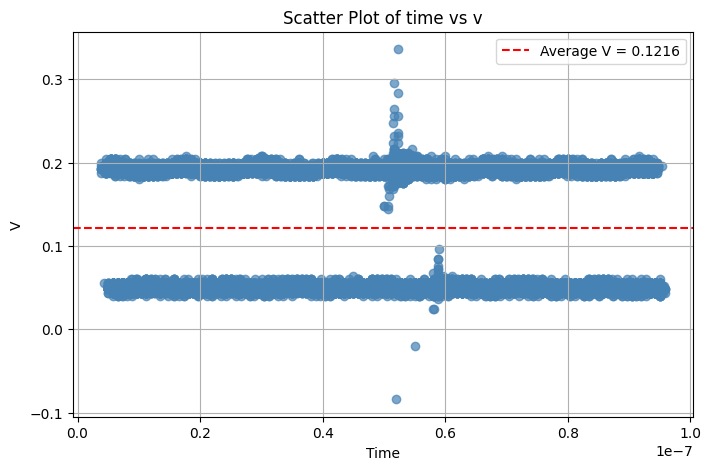

In [ ]:
''' 
View Extremas for all Phases
'''

plt.figure(figsize=(8, 5))

plt.scatter(extremas["Time"], extremas["V"], color="steelblue", alpha=0.7)

plt.title("Scatter Plot of time vs v")
plt.axhline(y=extremas["V"].mean(), color='red', linestyle='--', label=f'Average V = {extremas["V"].mean():.4f}')

plt.legend()
plt.xlabel("Time")
plt.ylabel("V")
plt.grid(True)
plt.show()

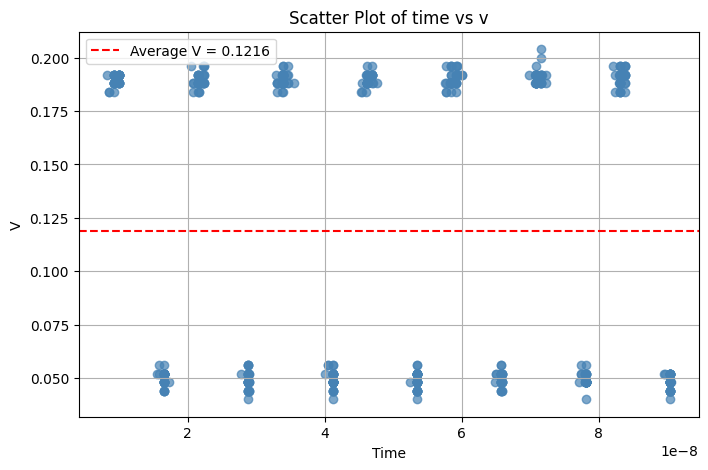

In [27]:
''' 
View Extremas within a range of phases
'''
min_phase = 350
max_phase = 400
min_phase = round(float(min_phase),1)
max_phase = round(float(max_phase),1)

bounded_extremas = extremas[(extremas["Frame"] >= min_phase) &
                            (extremas["Frame"] <= max_phase)]

plt.figure(figsize=(8, 5))
plt.scatter(extremas["Time"][2000:2500], extremas["V"][2000:2500], color="steelblue", alpha=0.7)

plt.title("Scatter Plot of time vs v")
plt.axhline(y=extremas["V"][2000:2500].mean(), color='red', linestyle='--', label=f'Average V = {extremas["V"].mean():.4f}')

plt.legend()
plt.xlabel("Time")
plt.ylabel("V")
plt.grid(True)
plt.show()

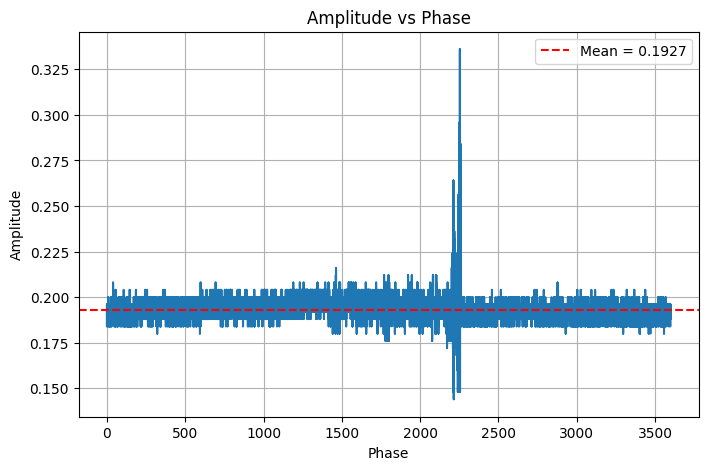

In [28]:
''' 
Local Maxima Graph
'''

maxima = extremas[(extremas['Local_Max']==True)] 
phase=np.array(maxima['Frame'])
amplitude = np.array(maxima['V'])

plt.figure(figsize=(8, 5))
plt.plot(phase, amplitude)
plt.axhline(y=np.mean(amplitude), color='red', linestyle='--', label=f'Mean = {np.mean(amplitude):.4f}')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Phase")
plt.grid(True)
plt.show()